In [1]:
import ipsuite as ips

2023-04-11 11:05:09,750 (DEBUG): Welcome to IPS - the Interatomic Potential Suite!


In [2]:
with ips.Project(remove_existing_graph=True) as project:
    data = ips.AddData(file="KCl1650K.extxyz")
    data = ips.configuration_selection.IndexSelection(data=data, indices=slice(None, None, 100))
    comparison = ips.configuration_comparison.MMKernel(
        analyte=data, 
        soap={
            'atomic_keys':["K", "Cl"],
            'n_max':5, # good starting point n=2l+1
            'l_max':2, 
            'r_cut':4, # defines the radius of the atomic environment
        },
    )

project.run()

2023-04-11 11:05:10.025139: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-11 11:05:10.094290: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-11 11:05:10.758257: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /data/fzills/tools/cuda/cuda-11.8/lib64:
2023-04-11 11:05:10.758301: W tensorflow/compiler/xla/str

In [3]:
comparison.load()

<Axes: xlabel='configuration_index'>

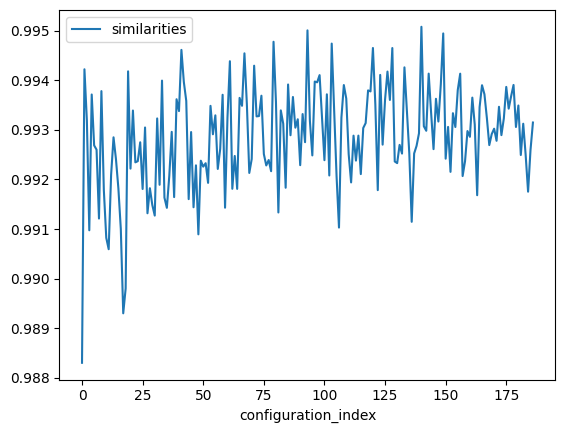

In [4]:
comparison.similarities.plot()